# Декораторы

Для начала необходимо определить, что представляют собой декораторы. Декораторы не являются генераторами или итераторами и не имеют никакого отношения к этим паттернам программирования. Декораторы представляют собой обёртки, которые накладываются на функции или классы в языке Python с целью изменения их поведения. Изначально мы имеем функцию, которая выполняет определённую задачу. При применении декоратора, которым, как правило, является другая функция, поведение исходной функции изменяется.

Декораторы позволяют разработчикам писать код гибко, сохраняя возможность расширять функциональность без изменения самой функции. Например, если нам необходимо вычислять время работы алгоритма, и этот процесс нужно использовать многократно, мы не будем повторять код вычисления времени в каждой функции. Вместо этого мы создаём декоратор, который добавляет необходимый функционал ко всем функциям, требующим такого дополнения.

**Декоратор представляет собой функцию, которая принимает другую функцию в качестве аргумента и возвращает новую функцию.**

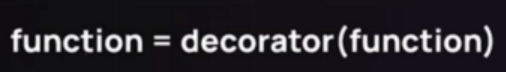

Ключевое понятие декоратора заключается в его способности изменять поведение функции. Однако такой подход может быть неудобен с точки зрения читаемости кода, поэтому для улучшения восприятия был введён так называемый синтаксический сахар. Это позволяет упростить применение декоратора, указав его непосредственно перед определением функции, которую мы хотим модифицировать.

**Если наша цель — не просто сохранить исходную функциональность функции, а сразу дополнить её дополнительными возможностями**, то на этапе её создания мы можем использовать символ «@», указав имя декоратора перед объявлением функции. В этом случае декоратор автоматически обёртывает функцию, и она будет выполнять дополнительные задачи, помимо исходной.

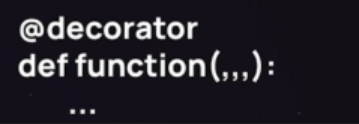

Существует два подхода к использованию декораторов:

- в первом случае мы можем переопределить функцию в любую переменную, не обязательно в «function». При этом исходный функционал функции сохраняется, но её поведение изменяется, так как она обёрнута в декоратор.

- во втором случае, на этапе создания функции, мы сразу же применяем декоратор, и в дальнейшем работаем уже с модифицированной функцией, не сохраняя её первоначальную форму.


In [2]:
def null_deco(func):
    print('Начало обертки')
    result = func
    print(f'{result=}')
    print('Конец обертки')
    return result

def greet():
    return 'Hello'

greet = null_deco(greet)
print(greet())

Начало обертки
result=<function greet at 0x000002CB56DF1C60>
Конец обертки
Hello


In [3]:
@null_deco
def greet():
    return 'Hello'

print(greet())

Начало обертки
result=<function greet at 0x000002CB56DF28E0>
Конец обертки
Hello


# Стандарт записи декоратора

In [7]:
def uppercase(func): # название декоратора и передача функции
    def wrapper(): # работа обёртки
        original_result = func()        
        if isinstance(original_result, str):
            print('*Обработка декоратором*')
            modified_result = original_result.upper()
        else:
            raise TypeError(f'Выходное значение функции не является строкой, а является {type(original_result)}')
        return modified_result
    return wrapper
        
@uppercase
def greet():
    return 'Hello'

@uppercase
def greet_d():
    return {'Hello':'World'}

print(greet())
print(greet_d())

*Обработка декоратором*
HELLO


TypeError: Выходное значение функции не является строкой, а является <class 'dict'>

Как известно, при создании функции внутри другой функции происходит замыкание переменных. Все локальные переменные, находящиеся на уровне выше, то есть внутри «uppercase», передаются в функционал функции «wrapper» аналогичным образом. Функции «wrapper» не требуется принимать на вход другую функцию.

Внутри функции «wrapper» вызывается исходная функция, и возвращается её результат, но с буквами в верхнем регистре. Этот результат является исключительно выходом функции «wrapper». Внутри функции «uppercase» возвращается функция «wrapper». Таким образом, декоратор работает корректно, возвращая функцию. Функция «wrapper», в свою очередь, возвращает строку с буквами в верхнем регистре. Функция «greet» фактически выполняет роль функции «wrapper», дополняя свой функционал. Она может быть вызвана аналогичным образом.

### В старом шаблоне, описанный декоратор будет выглядеть вот так

Если декоратор вместо возвращения другой функции будет возвращать какой-либо результат, то в таком случае мы не сможем вызвать функцию «greet». Мы исключим создание функции «wrapper» внутри декоратора и оставим только основной функционал. Рассмотрим декоратор «uppercase», который принимает на вход функцию. Результат выполнения этой функции сохраняется в переменной «original_result». То есть функция вызывается, и её результат сохраняется.

В переменной «modified_result» сохраняется изменённый результат, представляющий собой преобразование «original_result.upper()». Таким образом, все буквы в строке «Hello!» становятся заглавными. В завершение возвращается «modified_result».

Весь функционал нашего декоратора «uppercase» заключается в следующем. Мы применяем его к функции «greet», которая изначально возвращает строку «Hello!», и затем пытаемся вызвать эту функцию

Если мы попытаемся вызвать функцию в текущем состоянии, то получим ошибку «’str’ object is not callable». Это указывает на то, что объект типа строка не может быть вызван как функция

In [8]:
def uppercase(func):
    original_result = func()
    modified_result = original_result.upper()
    return modified_result

@uppercase
def greet():
    return 'hello'

print(greet())


TypeError: 'str' object is not callable

In [20]:
import sys
import time

sys.set_int_max_str_digits(10**8) # устанавливаем ограничитель для конвертации числа в строку до 10^8 символов


def time_track(func):
    def wrapper(*args, **kwargs):
        print(args, kwargs)
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed = round(end_time - start_time, 8)
        print(f'Функция {func.__name__} выполнена за {elapsed} секунд')
        return result
    return wrapper

@time_track
def digits(*args):
    total = 1
    for num in args:
        total *= num ** 2
    return len(str(total))

result = digits(*[i for i in range(1, 1000)])
result = digits(*[i for i in range(1, 10000)])

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

# Декоратор с параметрами

Также если нам нужно сделать параметры для самого декоратора, то уровень декоратораора будет выше, чем уровень исполняемой функции внутри wrapper, а ещё выше само новое название и параметры общего декоратора (decorator_with_params(param1, param2))

In [24]:
def decorator_with_params(param1, param2='Default'):
    def decorator(func):
        def wrapper(*args, **kwargs):
            print(f'Параметры декоратора:\n{param1=}\n{param2=}')
            print(f'Параметры функции {func.__name__}:\n{args=}\n{kwargs=}')
            result = func(*args, **kwargs)
            return result
        return wrapper
    return decorator

@decorator_with_params('parampam1', 'not default')
def my_func(x,y):
    return f'Результат работы функции {x + y}'


print(my_func(10,20))
print(my_func(10,y=20))


Параметры декоратора:
param1='parampam1'
param2='not default'
Параметры функции my_func:
args=(10, 20)
kwargs={}
Результат работы функции 30
Параметры декоратора:
param1='parampam1'
param2='not default'
Параметры функции my_func:
args=(10,)
kwargs={'y': 20}
Результат работы функции 30


In [2]:
!pip install tz


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\NatalkaNerealka\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [2]:
import datetime
import tz

def time_track(time_zone = 'Europe/Moscow'):
    def decorator(func):
        def wrapper(*args, **kwargs):
            print(args, kwargs)
            start_time = time.time()
            result = func(*args, **kwargs)
            end_time = time.time()
            elapsed = round(end_time - start_time, 8)
            print(f'{datetime.datetime.now(tz=tz(time_zone))} | Функция {func.__name__} выполнена за {elapsed} секунд')
            return result
        return wrapper
    return decorator

# Пример 2 c использванием декоратора с параметрами

In [6]:
import random
import time
import logging
import traceback

deco_loger = logging.getLogger('execution_logger')
deco_loger.setLevel(logging.INFO)
file_handler = logging.FileHandler('decorators.log', encoding='utf-8')
deco_loger.addHandler(file_handler)


def log_execution(level):
    def decorator(func):
        def wrapper(*args, **kwargs):
            
            
            start_time = time.time()
            try:
                result = func(*args, **kwargs)
            except: 
                result = None
            end_time = time.time()
            elapsed = round(end_time - start_time, 8)

            match level:
                case 'info':
                    deco_loger.info(f'[Информация] Функция {func.__name__} выполнена за {elapsed} секунд')
                case 'warning':
                    deco_loger.warning(f'[Предупреждение] Функция {func.__name__} выполнена за {elapsed} секунд')
                case 'error':
                    deco_loger.error(f'[Ошибка] Функция {func.__name__} была выполнена с ошибкой.\n {traceback.format_exc()}')
                case _:
                    print('Неопознаный уровень логирования')
            
            return result
        return wrapper
    return decorator

@log_execution('info')
def compute_sum(x,y):
    time.sleep(random.uniform(0,3))
    return x + y

@log_execution('warning')
def multiply(x,y):
    time.sleep(random.uniform(0,3))
    return x * y

@log_execution('error')
def test_module():
    time.sleep(random.uniform(0,3))
    raise Exception('Ошибка в модуле')

@log_execution('debug')
def debug_function():
    print("Этот функционал выполняется только при вызове декорированной функции.")

print(compute_sum(2, 3)) 
print(multiply(4, 5))
test_module()
debug_function()

    

5
20
Этот функционал выполняется только при вызове декорированной функции.
Неопознаный уровень логирования


Заменяющие функции — это функции, которые создаются внутри декоратора и заменяют исходную функцию, переданную декоратору в качестве аргумента. Их основная задача — модифицировать поведение исходной функции, оборачивая её дополнительной логикой.

In [14]:
import sys, time

def func_gen_dec(precision: int):
    def decorator(func):
        def wrapper(*args, **kwargs):
            start = time.time()
            result = func(*args, **kwargs)
            end   = time.time()
            print(f"Время выполнения: {end - start:.{precision}f} секунд. Размер результата: {sys.getsizeof(result)}")
            return result
        return wrapper
    return decorator

sys.set_int_max_str_digits(10**8)

@func_gen_dec(2)
def digits(*args):
    total = 1
    for num in args:
        total *= num ** 50
    return len(str(total))

result = digits(*[i for i in range(1, 100)])

time_track_precision_6 = func_gen_dec(6)
digits = time_track_precision_6(digits)

result = digits(*[i for i in range(1, 100)])


@time_track_precision_6
def digits(*args):
    total = 1
    for num in args:
        total *= num ** 50
    return len(str(total))

result = digits(*[i for i in range(1, 100)])

Время выполнения: 0.00 секунд. Размер результата: 28
Время выполнения: 0.00 секунд. Размер результата: 28
Время выполнения: 0.001509 секунд. Размер результата: 28
Время выполнения: 0.001266 секунд. Размер результата: 28


Рассматривается функция с названием «func_gen_dec». Данная функция предназначена для генерации декоратора и принимает на вход параметры, которые могут быть использованы внутри вложенных функций. Это возможно благодаря механизму замыкания переменных. Внутри функции «func_gen_dec» создаётся функция-декоратор, которая принимает функцию и, при необходимости, дополнительные параметры.


**Трёхглавый декоратор** — это декоратор в Python, который реализует многоуровневую (трёхэтапную) вложенность функций. Его особенность заключается в том, что он создаёт декоратор, который, в свою очередь, создаёт заменяющую функцию. Такая структура позволяет динамически изменять поведение декоратора на основе переданных ему параметров.

Декоратор — это функция, которая изменяет исходную функцию, а мы создали функцию, генерирующую декоратор, который будет изменять нашу функцию.